# Validation using DIGEST

Notebook to recreate the results presented in the paper. Keep in mind, that the results can slighty differentiate as the random background will not create the exact same random sets as before. 

## Setup

In [1]:
import os
import sys
import json
import pandas as pd
from IPython.display import IFrame
# ==== import single validation script ====
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from single_validation import single_validation, save_results
from evaluation.d_utils.plotting_utils import create_plots

/home/kikky/.local/lib/python3.8/site-packages/scipy/sparse/sputils.py:114: UserWarning: object dtype is not supported by sparse matrices
  warnings.warn("object dtype is not supported by sparse matrices")


## Cluster itself

Compare a target cluster of diseases or genes based on dunn index, sillhouette score or david bouldin index, while the random runs are simply cluster size preserving perturbation of cluster assignments.

## Gene Cluster

### Set input parameters

In [2]:
# ==== define required input ====
tar_cluster = pd.read_csv("input/target_gene_cluster.txt", header=None, sep="\t", dtype=str, names=["id", "cluster", "desc"])
tar_id_type = "symbol"
mode = "cluster"
# ==== define optional input ====
out_dir = "results/gene_cluster/" 
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
plot=True # create plots for vizualisation from results
verbose=True # printing additional information during the run
prefix="cluster_gene_symbol_complete"

### Run script

In [3]:
results = single_validation(tar=tar_cluster, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose)

[00:00:00|153.71MB] Starting validation ...
[00:00:00|153.71MB] Load mappings for input into cache ...
[00:00:02|613.73MB] Load distances for input into cache ...
[00:00:12|2414.79MB] Load input data ...
[00:00:13|2415.86MB] Validation of input ...
Missing values for pathway.kegg :9/20
[00:00:13|2415.86MB] Validation of random runs ...
[00:03:37|2417.18MB] Finished validation


### Inspect results

Check all P-values

In [4]:
pd.DataFrame(results["p_values"]['values'])

,di,ss,dbi
go.BP,0.068931,0.338661,0.128871
go.CC,0.399600,1.000000,0.797203
go.MF,0.423576,1.000000,0.766234
pathway.kegg,0.332667,1.000000,0.689311


Check validation values of input cluster

In [5]:
pd.DataFrame(results["input_values"]['values'])

,di,ss,ss_inter,dbi
go.BP,0.097523,-0.700000,"{1: -0.6, 0: -0.8}",0.180988
go.CC,0.181698,-1.000000,"{1: -1.0, 0: -1.0}",1.835614
go.MF,0.184877,-0.900000,"{1: -0.8, 0: -1.0}",1.962328
pathway.kegg,0.279293,-0.909091,"{0: -1.0, 1: -0.8}",0.275175


### Save results

#### Save full results as json and upper two tables as csv

In [6]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

/home/kikky/Projects/digest/application/evaluation/d_utils/plotting_utils.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapped_df[att] = [1 if x in results["input_values"]["mapped_ids"][att] else 0 for x in mapped_df['id']]


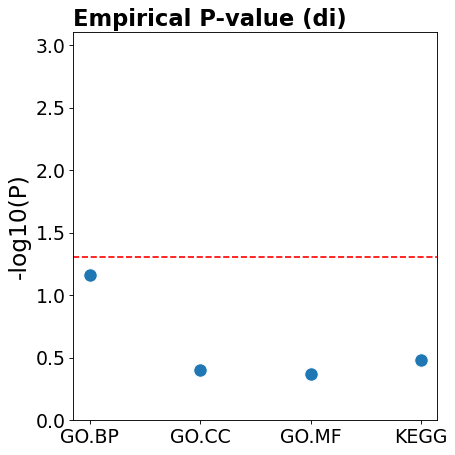

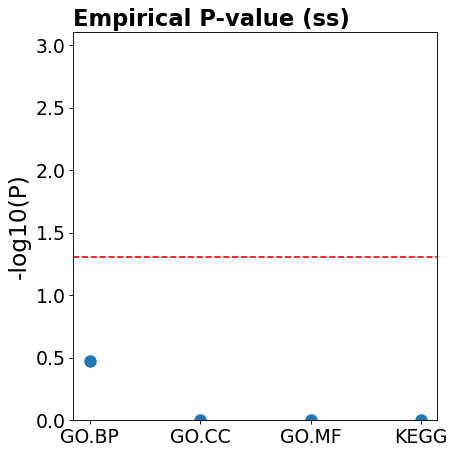

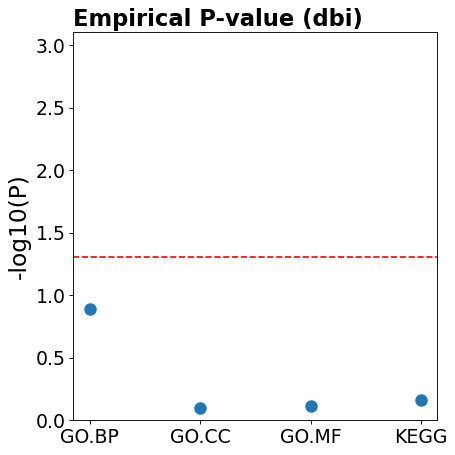

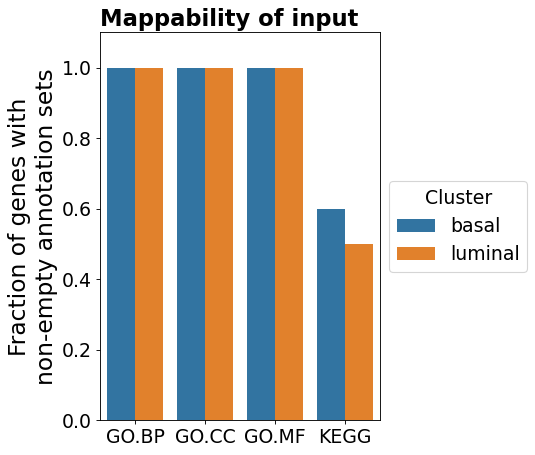

In [7]:
create_plots(results=results, mode=mode, tar=tar_cluster, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Disease Cluster

### Set input parameters

In [10]:
# ==== define required input ====
tar_cluster = pd.read_csv("input/target_disease_cluster.txt", header=None, sep="\t", dtype=str, names=["id", "cluster", "desc"])
tar_id_type = "ICD-10"
mode = "cluster"
# ==== define optional input ====
out_dir = "results/disease_cluster/" 
background_model="complete" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
plot=True # create plots for vizualisation from results
verbose=True # printing additional information during the run
prefix="cluster_disease_ICD-10_complete"

### Run script

In [9]:
results = single_validation(tar=tar_cluster, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose)

[00:00:00|2421.75MB] Starting validation ...
[00:00:00|2421.75MB] Load mappings for input into cache ...
[00:00:01|2424.41MB] Load distances for input into cache ...
[00:00:02|2632.29MB] Load input data ...
[00:00:02|2632.29MB] Validation of input ...
Missing values for disgenet.genes_related_to_disease :2/64
Missing values for disgenet.variants_related_to_disease :7/64
Missing values for ctd.pathway_related_to_disease :18/64
[00:00:03|2634.57MB] Validation of random runs ...
[00:12:26|2635.54MB] Finished validation


### Inspect results

Check all P-values

In [6]:
pd.DataFrame(results["p_values"]['values'])

,di,ss,dbi
disgenet.genes_related_to_disease,0.094905,0.333666,0.350649
disgenet.variants_related_to_disease,0.140859,0.068931,0.886114
ctd.pathway_related_to_disease,0.076923,0.206793,0.016983


Check validation values of input cluster

In [7]:
pd.DataFrame(results["input_values"]['values'])

,di,ss,ss_inter,dbi
disgenet.genes_related_to_disease,0.000598,-0.984640,"{5: -1.0, 4: -0.975536229900614, 2: -1.0, 6: -...",269.503692
disgenet.variants_related_to_disease,0.000041,-0.647423,"{5: -1.0, 4: -0.7041723039669122, 2: -1.0, 6: ...",1787.971398
ctd.pathway_related_to_disease,0.002213,-0.879166,"{5: -1.0, 4: -1.0, 2: -1.0, 6: -0.888328274347...",49.648030


### Save results

#### Save full results as json and upper two tables as csv

In [8]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

NameError: name 'prefix' is not defined

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

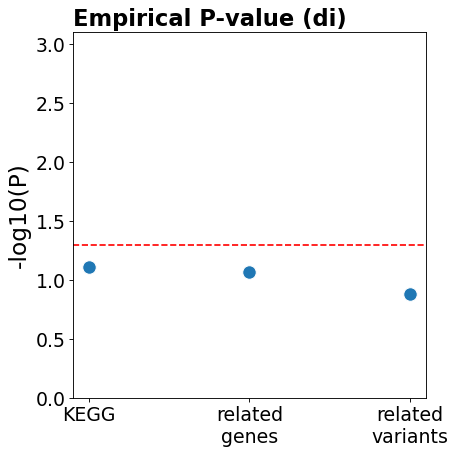

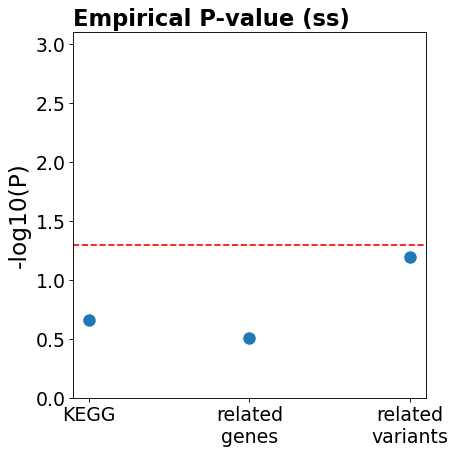

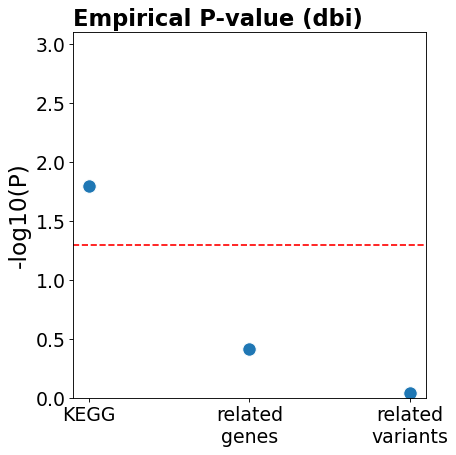

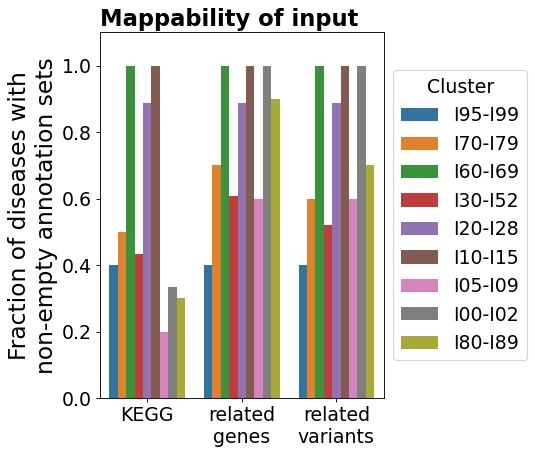

In [14]:
create_plots(results=results, mode=mode, tar=tar_cluster, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

Keep in mind, that after plotting, the resulting plots are also saved in the output directory.

## Set itself

Validate a set by reference, either reference set or id, or reference-free. Two background models can be used. 

## Disease Set

### Set input parameters

In [15]:
# ==== define required input ====
tar_set = pd.read_csv("input/target_disease_set.txt", header=None, sep="\t", dtype=str)[0]
tar_id_type = "mesh"
mode = "set"
# ==== define optional input ====
out_dir = "results/disease_set/" 
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
plot=True # create plots for vizualisation from results
verbose=True # printing additional information during the run
prefix="set_disease_mesh_term-pres"

### Run script

In [16]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, mode=mode, background_model=background_model, 
                            runs=runs, replace=perc, verbose=verbose)

[00:00:00|2635.54MB] Starting validation ...
[00:00:00|2635.54MB] Load mappings for input into cache ...
[00:00:01|2689.79MB] Load distances for input into cache ...
[00:00:03|2690.33MB] Validation of input ...
[00:00:03|2690.33MB] Validation of random runs ...
[00:00:35|2691.25MB] Calculating p-values ...
[00:00:35|2691.25MB] Finished validation


### Inspect results

Check all P-values

In [17]:
pd.DataFrame(results["p_values"]['values'])

,set_value
ctd.pathway_related_to_disease,0.035964
disgenet.genes_related_to_disease,0.037962
disgenet.variants_related_to_disease,0.009990


Check validation values of input cluster

In [18]:
pd.DataFrame(results["input_values"]['values'])

,set_value
ctd.pathway_related_to_disease,3.926356
disgenet.genes_related_to_disease,1.694796
disgenet.variants_related_to_disease,0.275038


### Save results

#### Save full results as json and upper two tables as csv

In [19]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

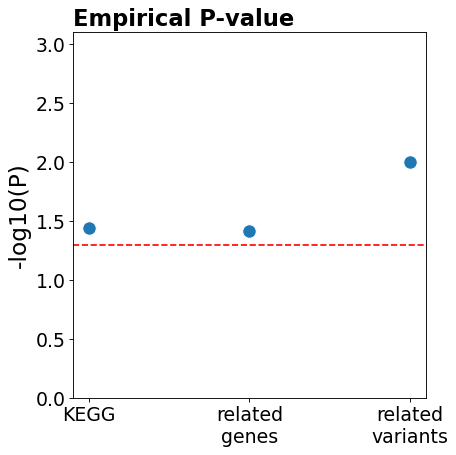

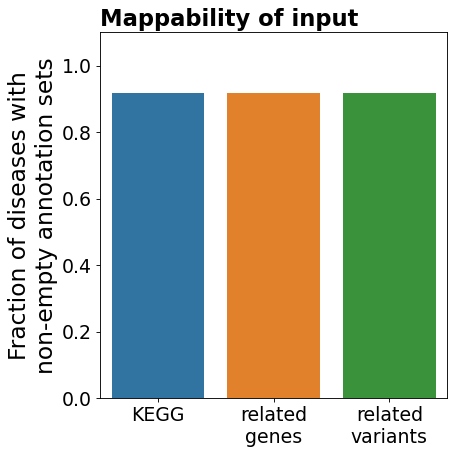

In [20]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)

## Gene Set

### Set input parameters

In [24]:
# ==== define required input ====
tar_set = pd.read_csv("input/target_gene_set.txt", header=None, sep="\t", dtype=str)[0]
tar_id_type = "symbol"
ref_set = pd.read_csv("input/reference_gene_set.txt", header=None, sep="\t", dtype=str)[0]
ref_id_type = "symbol"
mode = "set-set"
# ==== define optional input ====
out_dir = "results/gene_set/" 
enriched=True # only enriched values of reference set are used
background_model="term-pres" # the only background model for clustering
runs = 1000 # how many random runs for empirical p-value estimation
perc = 100 # how many % of the original input should be perturbated for the background model
plot=True # create plots for vizualisation from results
verbose=True # printing additional information during the run
prefix="set-set_gene_symbol_term-pres"

### Run script

In [25]:
results = single_validation(tar=tar_set, tar_id=tar_id_type, ref=ref_set, ref_id=ref_id_type, mode=mode, 
                            runs=runs, background_model=background_model, verbose=verbose, enriched=enriched)

[00:00:00|2721.83MB] Starting validation ...
[00:00:00|2721.83MB] Load mappings for input into cache ...
[00:00:18|2763.21MB] Validation of input ...
[00:00:18|2763.21MB] Validation of random runs ...
[00:02:02|2764.20MB] Calculating p-values ...
[00:02:02|2764.20MB] Finished validation


### Inspect results

Check all P-values

In [26]:
pd.DataFrame(results["p_values"]['values'])

,set_value
go.BP,0.000999
go.CC,0.000999
go.MF,0.003996
pathway.kegg,1.000000


Check validation values of input cluster

In [27]:
pd.DataFrame(results["input_values"]['values'])

,set_value
go.BP,0.625
go.CC,0.65
go.MF,0.35
pathway.kegg,0.0


### Save results

#### Save full results as json and upper two tables as csv

In [28]:
save_results(results=results, prefix=prefix, out_dir=out_dir)

#### Create visualization

If flag for plot was set, you can see a plot with the p-values for every attribute and a mappability plot showing how many of the input ids had assigned values per attribute.

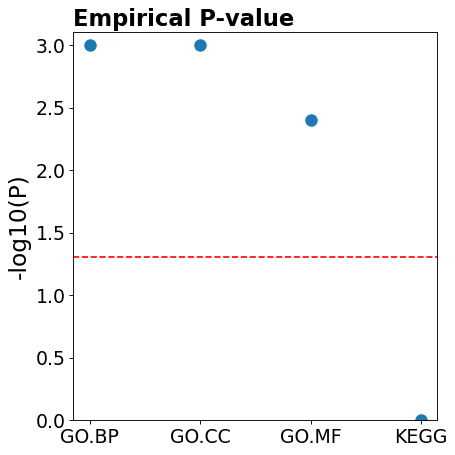

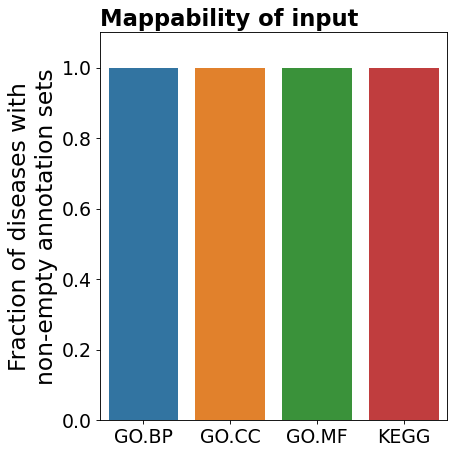

In [29]:
create_plots(results=results, mode=mode, tar=tar_set, tar_id=tar_id_type, out_dir=out_dir, prefix=prefix)